In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
df_raw = pd.read_csv('games-features.csv')

In [3]:
df_raw.head()

,QueryID,ResponseID,QueryName,ResponseName,ReleaseDate,RequiredAge,DemoCount,DeveloperCount,DLCCount,Metacritic,...,LegalNotice,Reviews,SupportedLanguages,Website,PCMinReqsText,PCRecReqsText,LinuxMinReqsText,LinuxRecReqsText,MacMinReqsText,MacRecReqsText
0,10,10,Counter-Strike,Counter-Strike,Nov 1 2000,0,0,1,0,88,...,,,English French German Italian Spanish Simplifi...,None,Minimum: 500 mhz processor 96mb ram 16mb video...,,Minimum: Linux Ubuntu 12.04 Dual-core from Int...,,Minimum: OS X Snow Leopard 10.6.3 1GB RAM 4GB...,
1,20,20,Team Fortress Classic,Team Fortress Classic,Apr 1 1999,0,0,1,0,0,...,,,English French German Italian Spanish,None,Minimum: 500 mhz processor 96mb ram 16mb video...,,Minimum: Linux Ubuntu 12.04 Dual-core from Int...,,Minimum: OS X Snow Leopard 10.6.3 1GB RAM 4GB...,
2,30,30,Day of Defeat,Day of Defeat,May 1 2003,0,0,1,0,79,...,,,English French German Italian Spanish,http://www.dayofdefeat.com/,Minimum: 500 mhz processor 96mb ram 16mb video...,,Minimum: Linux Ubuntu 12.04 Dual-core from Int...,,Minimum: OS X Snow Leopard 10.6.3 1GB RAM 4GB...,
3,40,40,Deathmatch Classic,Deathmatch Classic,Jun 1 2001,0,0,1,0,0,...,,,English French German Italian Spanish,None,Minimum: 500 mhz processor 96mb ram 16mb video...,,Minimum: Linux Ubuntu 12.04 Dual-core from Int...,,Minimum: OS X Snow Leopard 10.6.3 1GB RAM 4GB...,
4,50,50,Half-Life: Opposing Force,Half-Life: Opposing Force,Nov 1 1999,0,0,1,0,0,...,,,English French German Korean,None,Minimum: 500 mhz processor 96mb ram 16mb video...,,Minimum: Linux Ubuntu 12.04 Dual-core from Int...,,Minimum: OS X Snow Leopard 10.6.3 1GB RAM 4GB...,


### Selecting rows and columns used for analysis

In [4]:
df_raw.columns

Index(['QueryID', 'ResponseID', 'QueryName', 'ResponseName', 'ReleaseDate',
       'RequiredAge', 'DemoCount', 'DeveloperCount', 'DLCCount', 'Metacritic',
       'MovieCount', 'PackageCount', 'RecommendationCount', 'PublisherCount',
       'ScreenshotCount', 'SteamSpyOwners', 'SteamSpyOwnersVariance',
       'SteamSpyPlayersEstimate', 'SteamSpyPlayersVariance',
       'AchievementCount', 'AchievementHighlightedCount', 'ControllerSupport',
       'IsFree', 'FreeVerAvail', 'PurchaseAvail', 'SubscriptionAvail',
       'PlatformWindows', 'PlatformLinux', 'PlatformMac', 'PCReqsHaveMin',
       'PCReqsHaveRec', 'LinuxReqsHaveMin', 'LinuxReqsHaveRec',
       'MacReqsHaveMin', 'MacReqsHaveRec', 'CategorySinglePlayer',
       'CategoryMultiplayer', 'CategoryCoop', 'CategoryMMO',
       'CategoryInAppPurchase', 'CategoryIncludeSrcSDK',
       'CategoryIncludeLevelEditor', 'CategoryVRSupport', 'GenreIsNonGame',
       'GenreIsIndie', 'GenreIsAction', 'GenreIsAdventure', 'GenreIsCasual',
       'G

In [5]:
df_all = df_raw[['QueryName', 'Metacritic',
         #Genre variables
        'GenreIsNonGame', 'GenreIsIndie', 'GenreIsAction', 'GenreIsAdventure', 
         'GenreIsCasual','GenreIsStrategy', 'GenreIsRPG', 'GenreIsSimulation',
       'GenreIsEarlyAccess', 'GenreIsFreeToPlay', 'GenreIsSports', 'GenreIsRacing',
         #Category variables
        'CategorySinglePlayer','CategoryMultiplayer', 'CategoryCoop', 'CategoryMMO',
       'CategoryInAppPurchase', 'CategoryIncludeSrcSDK',
       'CategoryIncludeLevelEditor', 'CategoryVRSupport',
         #Platform variables
        'PlatformWindows', 'PlatformLinux', 'PlatformMac', 'PCReqsHaveMin',
       'PCReqsHaveRec', 'LinuxReqsHaveMin', 'LinuxReqsHaveRec',
       'MacReqsHaveMin', 'MacReqsHaveRec',
         #Additional Info
        'RequiredAge', 'DemoCount', 'DeveloperCount', 'DLCCount',
        'MovieCount', 'PackageCount', 'RecommendationCount', 
        'ScreenshotCount', 'SteamSpyOwners', 'SteamSpyOwnersVariance','SteamSpyPlayersEstimate', 
         'SteamSpyPlayersVariance','AchievementCount', 'ControllerSupport', 'FreeVerAvail', 
         'PurchaseAvail', 'SubscriptionAvail', 'PriceFinal',
         #Variables that need transformation
         'ReleaseDate', 'SupportedLanguages', 
         #Text variables
         'Reviews','DetailedDescrip','AboutText']]

In [6]:
df = df_all[df_all['Metacritic']>0]

### Dropping Duplicates

In [7]:
df = df.drop_duplicates()

In [8]:
df_vc = pd.DataFrame(df['QueryName'].value_counts())
df_vc[df_vc['QueryName']>1]

,QueryName
Sid Meier's Civilization IV: Colonization,2
Monday Night Combat,2
Fallout: New Vegas,2
Darksiders,2
Alpha Protocol,2
Sid Meier's Civilization V,2
Sid Meier's Civilization IV: Beyond the Sword,2
Sid Meier's Civilization IV: Warlords,2
Arma 2,2
Sid Meier's Civilization IV,2


In [9]:
#drop Sid Meier's Civilization IV: Colonization dup 
df=df.drop(965)
#drop Fallout: New Vegas dup
df=df.drop(952)
#drop Sid Meier's Civilization V dup
df=df.drop(1205)
#drop Darksiders dup
df=df.drop(1210)
#drop Sid Meier's Civilization IV dup
df=df.drop(962)
#Drop Monday night combat dup
df=df.drop(1278)
#Drop Sid Meier's Civilization IV: Beyond the Sword dup
df=df.drop(964)
#Drop Sid Meier's Civilization IV: Warlords dup
df=df.drop(963)
#Drop Arma 2 dup
df=df.drop(782)
#Drop Alpha Protocol dup
df=df.drop(961)

### Cleaning Languages

In [10]:
import re
pd.set_option('display.max_rows', None)
languages = df['SupportedLanguages'].tolist()

#Split to check all languages
split_lst = []
for language in languages:
    split_lang = re.split('\* |\*|\s|\*\*', language)
    for lang in split_lang:
        split_lst.append(lang)

split_series = pd.Series(split_lst)
split_df = pd.DataFrame(split_series.value_counts())
#split_df[split_df[0]>0]
#lang_list= split_df.index.values.tolist()
#print(lang_list)

In [11]:
#Create list of all possible languages
language_list=['English', 'German', 'French', 'Spanish',  'Italian', 'Russian', 'Polish', 
               'Japanese', 'Portuguese-Brazil', 'Czech', 'Korean', 'Simplified Chinese', 
               'Dutch', 'Traditional Chinese', 'Portuguese', 'Hungarian', 'Turkish', 'Swedish', 
               'Danish', 'Norwegian', 'Finnish', 'Ukrainian', 'Romanian', 'Thai', 'Greek', 
               'Bulgarian', 'Arabic',  'Slovakian']

In [12]:
#Create boolean columns for each language
for language in language_list:
    df[language]=df['SupportedLanguages'].str.contains(language)

In [13]:
#create boolean column for audio support (will delete later, using this as reference to check regex)
df.loc[df['SupportedLanguages'].str.contains("languages with full audio support")==True, 'audio_support?'] = 1
df.loc[df['SupportedLanguages'].str.contains("languages with full audio support")==False, 'audio_support?'] = 0

In [14]:
#Create transformed language columns without "languages with full audio support" statement
df['transformed']= df['SupportedLanguages'].str.extract("(.+?)\*languages with full audio support")

In [15]:
#Count * in transformed column to count number of languages with audio support
df['num_lang_audio_support']=df['transformed'].str.count('\*')
df['num_lang_audio_support'] = df['num_lang_audio_support'].fillna(0)

In [16]:
pd.set_option('display.max_columns', None)
df.head(100)

,QueryName,Metacritic,GenreIsNonGame,GenreIsIndie,GenreIsAction,GenreIsAdventure,GenreIsCasual,GenreIsStrategy,GenreIsRPG,GenreIsSimulation,GenreIsEarlyAccess,GenreIsFreeToPlay,GenreIsSports,GenreIsRacing,CategorySinglePlayer,CategoryMultiplayer,CategoryCoop,CategoryMMO,CategoryInAppPurchase,CategoryIncludeSrcSDK,CategoryIncludeLevelEditor,CategoryVRSupport,PlatformWindows,PlatformLinux,PlatformMac,PCReqsHaveMin,PCReqsHaveRec,LinuxReqsHaveMin,LinuxReqsHaveRec,MacReqsHaveMin,MacReqsHaveRec,RequiredAge,DemoCount,DeveloperCount,DLCCount,MovieCount,PackageCount,RecommendationCount,ScreenshotCount,SteamSpyOwners,SteamSpyOwnersVariance,SteamSpyPlayersEstimate,SteamSpyPlayersVariance,AchievementCount,ControllerSupport,FreeVerAvail,PurchaseAvail,SubscriptionAvail,PriceFinal,ReleaseDate,SupportedLanguages,Reviews,DetailedDescrip,AboutText,English,German,French,Spanish,Italian,Russian,Polish,Japanese,Portuguese-Brazil,Czech,Korean,Simplified Chinese,Dutch,Traditional Chinese,Portuguese,Hungarian,Turkish,Swedish,Danish,Norwegian,Finnish,Ukrainian,Romanian,Thai,Greek,Bulgarian,Arabic,Slovakian,audio_support?,transformed,num_lang_audio_support
0,Counter-Strike,88,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,True,True,True,False,True,False,True,False,0,0,1,0,0,1,68991,13,13033334,92789,9140731,78136,0,False,False,True,False,9.99,Nov 1 2000,English French German Italian Spanish Simplifi...,,Play the worlds number 1 online action game. E...,Play the worlds number 1 online action game. E...,True,True,True,True,True,False,False,False,False,False,True,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,0.0,NaN,0.0
2,Day of Defeat,79,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,True,True,True,False,True,False,True,False,0,0,1,0,0,1,2319,5,7621102,71499,1709740,34145,0,False,False,True,False,4.99,May 1 2003,English French German Italian Spanish,,Enlist in an intense brand of Axis vs. Allied ...,Enlist in an intense brand of Axis vs. Allied ...,True,True,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,0.0,NaN,0.0
6,Half-Life,96,False,False,True,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,True,True,True,True,False,True,False,True,False,0,0,1,1,0,1,12486,11,5927504,63206,2268772,39303,0,False,False,True,False,9.99,Nov 8 1998,English French German Italian Spanish Simplifi...,,Named Game of the Year by over 50 publications...,Named Game of the Year by over 50 publications...,True,True,True,True,True,False,False,False,False,False,True,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,0.0,NaN,0.0
7,Counter-Strike: Condition Zero,65,False,False,True,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,True,True,True,True,False,False,False,False,False,0,0,1,0,0,1,7067,8,10489261,83543,4127910,52878,0,False,False,True,False,9.99,Mar 1 2004,English French German Italian Spanish Simplifi...,,With its extensive Tour of Duty campaign a nea...,With its extensive Tour of Duty campaign a nea...,True,True,True,True,True,False,False,False,False,False,True,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,0.0,NaN,0.0
9,Half-Life: Blue Shift,71,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,True,True,True,False,True,False,True,False,0,0,1,0,0,1,2219,5,5368650,60199,662517,21286,0,False,False,True,False,4.99,Jun 1 2001,English French German,,Made by Gearbox Software and originally releas...,Made by Gearbox Software and originally releas...,True,True,True,False,False,False,False,False,False,Fa

In [17]:
#Convert bool to numeric and sum
df[['English', 'German', 'French', 'Spanish',  'Italian', 'Russian', 'Polish', 
               'Japanese', 'Portuguese-Brazil', 'Czech', 'Korean', 'Simplified Chinese', 
               'Dutch', 'Traditional Chinese', 'Portuguese', 'Hungarian', 'Turkish', 'Swedish', 
               'Danish', 'Norwegian', 'Finnish', 'Ukrainian', 'Romanian', 'Thai', 'Greek', 
               'Bulgarian', 'Arabic',  'Slovakian']] = df[['English', 'German', 'French', 'Spanish',  'Italian', 'Russian', 'Polish', 
               'Japanese', 'Portuguese-Brazil', 'Czech', 'Korean', 'Simplified Chinese', 
               'Dutch', 'Traditional Chinese', 'Portuguese', 'Hungarian', 'Turkish', 'Swedish', 
               'Danish', 'Norwegian', 'Finnish', 'Ukrainian', 'Romanian', 'Thai', 'Greek', 
               'Bulgarian', 'Arabic',  'Slovakian']].replace({True: 1, False: 0})

df['num_languages']=df[['English', 'German', 'French', 'Spanish',  'Italian', 'Russian', 'Polish', 
               'Japanese', 'Portuguese-Brazil', 'Czech', 'Korean', 'Simplified Chinese', 
               'Dutch', 'Traditional Chinese', 'Portuguese', 'Hungarian', 'Turkish', 'Swedish', 
               'Danish', 'Norwegian', 'Finnish', 'Ukrainian', 'Romanian', 'Thai', 'Greek', 
               'Bulgarian', 'Arabic',  'Slovakian']].sum(axis=1)

In [18]:
#Drop columns used in transformations
df=df.drop("transformed", axis=1)
df=df.drop("audio_support?", axis=1)

In [19]:
pd.set_option('display.max_columns', None)
df.head(100)

,QueryName,Metacritic,GenreIsNonGame,GenreIsIndie,GenreIsAction,GenreIsAdventure,GenreIsCasual,GenreIsStrategy,GenreIsRPG,GenreIsSimulation,GenreIsEarlyAccess,GenreIsFreeToPlay,GenreIsSports,GenreIsRacing,CategorySinglePlayer,CategoryMultiplayer,CategoryCoop,CategoryMMO,CategoryInAppPurchase,CategoryIncludeSrcSDK,CategoryIncludeLevelEditor,CategoryVRSupport,PlatformWindows,PlatformLinux,PlatformMac,PCReqsHaveMin,PCReqsHaveRec,LinuxReqsHaveMin,LinuxReqsHaveRec,MacReqsHaveMin,MacReqsHaveRec,RequiredAge,DemoCount,DeveloperCount,DLCCount,MovieCount,PackageCount,RecommendationCount,ScreenshotCount,SteamSpyOwners,SteamSpyOwnersVariance,SteamSpyPlayersEstimate,SteamSpyPlayersVariance,AchievementCount,ControllerSupport,FreeVerAvail,PurchaseAvail,SubscriptionAvail,PriceFinal,ReleaseDate,SupportedLanguages,Reviews,DetailedDescrip,AboutText,English,German,French,Spanish,Italian,Russian,Polish,Japanese,Portuguese-Brazil,Czech,Korean,Simplified Chinese,Dutch,Traditional Chinese,Portuguese,Hungarian,Turkish,Swedish,Danish,Norwegian,Finnish,Ukrainian,Romanian,Thai,Greek,Bulgarian,Arabic,Slovakian,num_lang_audio_support,num_languages
0,Counter-Strike,88,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,True,True,True,False,True,False,True,False,0,0,1,0,0,1,68991,13,13033334,92789,9140731,78136,0,False,False,True,False,9.99,Nov 1 2000,English French German Italian Spanish Simplifi...,,Play the worlds number 1 online action game. E...,Play the worlds number 1 online action game. E...,1,1,1,1,1,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,8
2,Day of Defeat,79,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,True,True,True,False,True,False,True,False,0,0,1,0,0,1,2319,5,7621102,71499,1709740,34145,0,False,False,True,False,4.99,May 1 2003,English French German Italian Spanish,,Enlist in an intense brand of Axis vs. Allied ...,Enlist in an intense brand of Axis vs. Allied ...,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,5
6,Half-Life,96,False,False,True,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,True,True,True,True,False,True,False,True,False,0,0,1,1,0,1,12486,11,5927504,63206,2268772,39303,0,False,False,True,False,9.99,Nov 8 1998,English French German Italian Spanish Simplifi...,,Named Game of the Year by over 50 publications...,Named Game of the Year by over 50 publications...,1,1,1,1,1,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,8
7,Counter-Strike: Condition Zero,65,False,False,True,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,True,True,True,True,False,False,False,False,False,0,0,1,0,0,1,7067,8,10489261,83543,4127910,52878,0,False,False,True,False,9.99,Mar 1 2004,English French German Italian Spanish Simplifi...,,With its extensive Tour of Duty campaign a nea...,With its extensive Tour of Duty campaign a nea...,1,1,1,1,1,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,8
9,Half-Life: Blue Shift,71,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,True,True,True,False,True,False,True,False,0,0,1,0,0,1,2219,5,5368650,60199,662517,21286,0,False,False,True,False,4.99,Jun 1 2001,English French German,,Made by Gearbox Software and originally releas...,Made by Gearbox Software and originally releas...,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,3
10,Half-Life 2,96,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,False,False,True,True,True,False,False,False,False,False,False,0,1,1,1,2,2,35792,9,9901173,81234,5695963,61979,33,False,False,True,False,9.99,Nov 16 2004,English* French* German* Italian* Korean* Span...,,1998. HALF-LIFE sends a shock through the game...,1998. HALF-LIFE sends a shock through the game...,1,1,1,1,1,1,1,1,0,0

### Cleaning Dates

In [20]:
#Check for dates with inaccurate format
df['ReleaseDate'][df['ReleaseDate'].str.fullmatch('[a-zA-Z]{3}\s\d*?\s\d{4}')==False]

305                Feb 2011
529                        
572                        
668                Jun 2009
687                Jul 2010
904                Sep 2009
1008                       
1180               Mar 2010
1199                       
1228               Apr 2010
1253               Jul 2010
1268               Oct 2010
1269               Oct 2010
1578                       
1856                       
1922                       
1993                       
2171                       
2183                       
2201                       
2214                       
2317               Aug 2013
3805               Nov 2014
4103               May 2015
4943               Jun 2015
12068    December 20th 2016
Name: ReleaseDate, dtype: object

In [21]:
#Convert these dates to accurate format, replace blanks with NAs
df['ReleaseDate']= df['ReleaseDate'].replace({'Oct 2010': 'Oct 1 2010', 'Jul 2010':'Jul 1 2010', 'Aug 2013': 'Aug 2013',
                          'Jun 2015': 'Jun 1 2015', 'December 20th 2016': 'Dec 20 2016',
                          'May 2015': 'May 1 2015', 'Nov 2014': 'Nov 1 2014', 'Sep 2009':'Sep 1 2009',
                          'Jun 2009': 'Jun 1 2009', 'Feb 2011':'Feb 1 2011', 'Mar 2010':'Mar 1 2010',
                          'Apr 2010': 'Apr 1 2010', 'Aug 2013': 'Aug 1 2013'})
df['ReleaseDate'] = df['ReleaseDate'].replace(r'^\s*$', np.nan, regex=True)

In [22]:
#Convert to datetime
df['ReleaseDate'] = pd.to_datetime(df['ReleaseDate'])

In [23]:
#check data type
df['ReleaseDate'].dtype

dtype('<M8[ns]')

In [24]:
df.describe()

,Metacritic,RequiredAge,DemoCount,DeveloperCount,DLCCount,MovieCount,PackageCount,RecommendationCount,ScreenshotCount,SteamSpyOwners,SteamSpyOwnersVariance,SteamSpyPlayersEstimate,SteamSpyPlayersVariance,AchievementCount,PriceFinal,English,German,French,Spanish,Italian,Russian,Polish,Japanese,Portuguese-Brazil,Czech,Korean,Simplified Chinese,Dutch,Traditional Chinese,Portuguese,Hungarian,Turkish,Swedish,Danish,Norwegian,Finnish,Ukrainian,Romanian,Thai,Greek,Bulgarian,Arabic,Slovakian,num_lang_audio_support,num_languages
count,2235.000000,2235.000000,2235.000000,2235.000000,2235.000000,2235.000000,2235.000000,2.235000e+03,2235.000000,2.235000e+03,2235.000000,2.235000e+03,2235.000000,2235.000000,2235.000000,2235.0,2235.000000,2235.000000,2235.000000,2235.000000,2235.000000,2235.000000,2235.000000,2235.000000,2235.000000,2235.000000,2235.000000,2235.000000,2235.00000,2235.000000,2235.000000,2235.000000,2235.000000,2235.000000,2235.000000,2235.000000,2235.000000,2235.000000,2235.000000,2235.000000,2235.000000,2235.000000,2235.000000,2235.000000,2235.000000
mean,72.008501,2.508277,0.186577,1.087696,1.502013,1.798210,1.680984,4.552546e+03,11.968680,5.867512e+05,13742.305145,4.127886e+05,10733.005369,26.519911,14.024385,1.0,0.607159,0.587472,0.532886,0.474273,0.351678,0.234004,0.161074,0.153020,0.085906,0.078747,0.076510,0.069799,0.05906,0.187919,0.051007,0.044743,0.036242,0.032215,0.029083,0.027740,0.015660,0.013870,0.008949,0.008949,0.008949,0.008501,0.000447,1.216555,4.945861
std,11.152135,5.984335,0.391950,0.362037,5.995998,1.829089,1.023349,3.541729e+04,7.336697,2.455699e+06,14185.781091,2.313979e+06,12541.438116,53.770134,10.488378,0.0,0.488491,0.492399,0.499029,0.499449,0.477601,0.423470,0.367681,0.360087,0.280288,0.269404,0.265872,0.254864,0.23579,0.390735,0.220061,0.206785,0.186933,0.176610,0.168076,0.164265,0.124184,0.116979,0.094194,0.094194,0.094194,0.091829,0.021152,2.172011,4.165792
min,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,2.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,66.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.370000e+02,8.000000,3.560100e+04,4938.000000,1.721800e+04,3434.000000,0.000000,8.365000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,73.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,5.180000e+02,10.000000,1.303870e+05,9449.000000,6.725600e+04,6787.000000,15.000000,9.990000,1.0,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000
75%,80.000000,0.000000,0.000000,1.000000,1.000000,2.000000,2.000000,2.118500e+03,14.000000,4.602110e+05,17745.000000,2.679480e+05,13543.500000,39.000000,19.990000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,7.000000
max,96.000000,18.000000,2.000000,5.000000,169.000000,20.000000,11.000000,1.427633e+06,114.000000,9.068758e+07,215972.000000,9.068758e+07,215972.000000,1448.000000,99.990000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000

## Final Cleaning

In [25]:
#Create game_age variable
now = pd.to_datetime('now')
df['Game_Age']=(now - df['ReleaseDate']).dt.total_seconds() / (60*60*24*365.25)

#make columns for month, drop date column
#df_lr['Year'] = df_lr['ReleaseDate'].dt.year 
df['Month'] = df['ReleaseDate'].dt.month_name()
df=df.drop('ReleaseDate', axis=1)

#Make dummy variables for months
df = pd.concat([df, pd.get_dummies(df['Month'])], axis=1)
df = df.drop('Month', axis=1)

#Make booleans numeric
df=df.replace({True: 1, False: 0})

#shuffle rows
df_shuffled= df.sample(frac=1, random_state=1).reset_index()
df_shuffled.shape

/var/folders/z4/dn_6f5qs1cq2pv3rhcbft8w40000gn/T/ipykernel_44055/3443521371.py:2: FutureWarning: The parsing of 'now' in pd.to_datetime without `utc=True` is deprecated. In a future version, this will match Timestamp('now') and Timestamp.now()
  now = pd.to_datetime('now')


(2235, 97)

# Embeddings Model

In [26]:
# standard
import pandas as pd
import numpy as np
import random
import os

# tf and keras
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import GlobalAveragePooling1D
from tensorflow.keras.layers import Dropout
import tensorflow_datasets as tfds

# shap
import shap

# plots and images
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import Image

# others
!pip install wordcloud
import re
from sklearn.decomposition import PCA
from wordcloud import WordCloud
from collections import Counter
import warnings
warnings.filterwarnings("ignore")

#silence TF
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 


random.seed(2)
%matplotlib inline

2023-03-21 21:05:34.582893: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
/Users/amandamurray/opt/anaconda3/envs/w207_final/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [27]:
def preprocessor(text):
    text = re.sub('<[^>]*>', '', text)
    emoticons = re.findall('(?::|;|=)(?:-)?(?:\)|\(|D|P)',
                           text)
    text = (re.sub('[\W]+', ' ', text.lower()) +
            ' '.join(emoticons).replace('-', ''))
    return text

In [28]:
# define function for token encoder
def encode(text_tensor, label):
    text = text_tensor.numpy()[0]
    encoded_text = encoder.encode(text)
    return encoded_text, label

#  wrap the encode function to a TF Operator
def encode_map_fn(text, label):
    return tf.py_function(encode, inp=[text, label], 
                          Tout=(tf.int64, tf.int64))

In [29]:
df_emb = df[['Metacritic', 'AboutText']]

In [30]:
df_emb['AboutText'] = df_emb['AboutText'].apply(preprocessor)

### create tensorflow dataset

In [31]:
# define target
target = df_emb.pop('Metacritic') # .pop removes sentiment col from df

# target and review combined tensors
data_tf = tf.data.Dataset.from_tensor_slices(
    (df_emb[['AboutText']].values, target.values)
)

In [32]:
# inspection of the first 5 examples
for example in data_tf.take(5):
    # print review (first 40 characters) and sentiment (label)
    tf.print(example[0].numpy()[0][:40], example[1])

b'play the worlds number 1 online action g' 88
b'enlist in an intense brand of axis vs al' 79
b'named game of the year by over 50 public' 96
b'with its extensive tour of duty campaign' 65
b'made by gearbox software and originally ' 71


In [33]:
# set random seed
tf.random.set_seed(1)

# define splits for training, validation, test
splits=[0.6, 0.2, 0.2] 

# shuffle data
data_tf = data_tf.shuffle(
    df_emb.shape[0], reshuffle_each_iteration=False)

data_tf_test = data_tf.take(int(df_emb.shape[0]*splits[2]))
data_tf_train_valid = data_tf.skip(int(df_emb.shape[0]*splits[2]))
data_tf_train = data_tf_train_valid.take(int(df_emb.shape[0]*splits[0]))
data_tf_valid = data_tf_train_valid.skip(int(df_emb.shape[0]*splits[0]))

### Tokens

In [34]:
# try and except the TF tokenizer
try:
    tokenizer = tfds.features.text.Tokenizer()
except AttributeError:
    tokenizer = tfds.deprecated.text.Tokenizer()

# create an instance of the Counter class
token_counts = Counter()

for example in data_tf_train:
    tokens = tokenizer.tokenize(example[0].numpy()[0])
    token_counts.update(tokens)
    
print('Size of training vocabulary:', len(token_counts))

Size of training vocabulary: 23518


In [35]:
# create an instance of the TF encoder class
try:
    encoder = tfds.features.text.TokenTextEncoder(token_counts) # token_counts contains our training vocabulary
except AttributeError:
    encoder = tfds.deprecated.text.TokenTextEncoder(token_counts)

# try an example first (first 12 characters from the second review in training data)
example_str = 'My son took generic for about 6 months.  his his dr actually prescribed prescribed'
encoder.encode(example_str) # the encode method transforms the text into integers

[23519,
 4287,
 5470,
 16148,
 93,
 311,
 137,
 7900,
 277,
 277,
 6236,
 5292,
 23519,
 23519]

In [36]:
# the encode_map_fn is defined at the top of the notebook
data_tf_train = data_tf_train.map(encode_map_fn)
data_tf_valid = data_tf_valid.map(encode_map_fn)
data_tf_test = data_tf_test.map(encode_map_fn)

In [37]:
# print first two examples in training data
for example in data_tf_train.take(2):
    print ('----------------------------')
    print('Sequence length:', example[0].shape)
    print('Integer sequence:\n', example[0].numpy())


----------------------------
Sequence length: (220,)
Integer sequence:
 [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
   2   3   5   4  19  20  21  22  23  24  25  26  27  18  28  29  30  31
  32  22  18  33  34  35  36  37  38  39  40  18  41  42  24  43  44  45
  18  46  47  48  49  30  50  51  52  53  54  42  49  55   1  56  24  18
  57  58  59  60  61  62  63  64  12  65  45  18  66  24  12  16  52  67
  12  68  69  70  59  71  36  72  73  63  74  75  76  77  25  59  78  36
  72  24  79  80  49  81   8   9  10  82  18  20  45  69   4  76   8  83
  10  84  85  86  49  87  18  88  89  90  85  91  92  93  49  45  12  72
  69  76  94  59  95  94  96  36  16  76  77  25  45  97  98  99  98 100
  93  71  20 101 102 103 104 105 106  36 107 108  86 109 110 111 112 113
 114 115 102 116 117  45 103  52 118  18 119  24 120  71  12 121  59 122
  36 123 124  52 125  12 126 127 128 129  45 130  52 131  98 132 133  93
 134 135 131  10]
----------------------------
Seque

In [38]:
# take a small subset from training data and print len of sequence
data_tf_train_subset = data_tf_train.take(8)
for idx, example in enumerate(data_tf_train_subset):
    if idx%3==0:
        print('-------------')
    print('Individual size:', example[0].shape)

-------------
Individual size: (220,)
Individual size: (140,)
Individual size: (178,)
-------------
Individual size: (308,)
Individual size: (276,)
Individual size: (393,)
-------------
Individual size: (65,)
Individual size: (30,)


In [39]:
# define batch size
batch_size = 4

# batcing of training, validation and test partitions
train_data = data_tf_train.padded_batch(
    batch_size,
    padded_shapes=([-1],[]))

valid_data = data_tf_valid.padded_batch(
    batch_size,
    padded_shapes=([-1],[]))

test_data = data_tf_test.padded_batch(
    batch_size,
    padded_shapes=([-1],[]))

Average sequence length in training mini-batches: 417


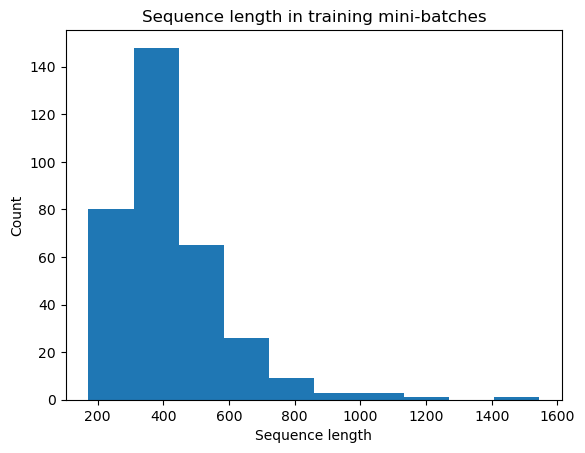

In [40]:
# histogram of sequence length in training mini-batches
seq_len_train = []
for batch in train_data:
    seq_len_train.append(batch[0].shape[1])
    
print('Average sequence length in training mini-batches:',
      int(sum(seq_len_train)/len(seq_len_train))
)

# histogram
plt.hist(seq_len_train)
plt.title('Sequence length in training mini-batches')
plt.ylabel('Count')
plt.xlabel('Sequence length');

In [41]:
# Embed our training vocabulary into 10 dimensions.
vocab_size_train = len(token_counts) + 2
embedding_dim = 10

embedding_layer = tf.keras.layers.Embedding(
    vocab_size_train,
    embedding_dim,
)

## Model

In [70]:
vocab_size_train = len(token_counts) + 2
embedding_dim = 20

model = tf.keras.Sequential()
# add embedding layer (this is our imput layer)
# embeddings will be learned during training
# the weights for the embeddings are randomly initialized (just like any other layer!)
model.add(Embedding(
    vocab_size_train,
    embedding_dim,
    #input_length=100, #limits length of sentence to 100 tokens
    name="embedding")
    ),


# average over the emedding dimension, so each review is represented by a 1 vector of size embedding_dimension
model.add(GlobalAveragePooling1D()),

# add a Dense layer of dimension 16
model.add(Dense(16, activation='relu')),

# add Dropout for regularization
#model.add(Dropout(0.05))

# add a Dense layer of dimension 16
#model.add(Dense(16, activation='tanh')),

# add a Dense layer of dimension 16
model.add(Dense(16, activation='relu')),

# add Dropout for regularization
model.add(Dropout(0.05))

# add last layer (binary classification task)
model.add(Dense(1, activation='linear'))


# save embeddings before training 
embeddings_untrained = model.get_layer('embedding').get_weights()[0]

# print model summary
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 20)          470400    
                                                                 
 global_average_pooling1d_7   (None, 20)               0         
 (GlobalAveragePooling1D)                                        
                                                                 
 dense_34 (Dense)            (None, 16)                336       
                                                                 
 dense_35 (Dense)            (None, 16)                272       
                                                                 
 dropout_9 (Dropout)         (None, 16)                0         
                                                                 
 dense_36 (Dense)            (None, 1)                 17        
                                                      

In [71]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(1e-3),
    loss='mean_squared_error')

In [72]:
# set random seed to get reproductible results 
# neural network algorithms are stochastic (e.g., due to random weight initialization); setting a random seed helps to get more stable results after each run
# however, best way to deal with randomness is to repeat your experiment many times (30+) and use statistics to summarize the performance of the model
tf.random.set_seed(1)
np.random.seed(1)
history = model.fit(
    train_data, 
    validation_data=valid_data, 
    epochs=15)

Epoch 1/15
336/336 [==============================] - 2s 4ms/step - loss: 3153.0813 - val_loss: 221.8666
Epoch 2/15
336/336 [==============================] - 1s 4ms/step - loss: 209.9599 - val_loss: 144.9202
Epoch 3/15
336/336 [==============================] - 1s 4ms/step - loss: 179.1390 - val_loss: 137.6197
Epoch 4/15
336/336 [==============================] - 1s 4ms/step - loss: 170.6918 - val_loss: 133.9158
Epoch 5/15
336/336 [==============================] - 1s 4ms/step - loss: 170.1732 - val_loss: 128.8337
Epoch 6/15
336/336 [==============================] - 1s 4ms/step - loss: 152.0271 - val_loss: 129.6004
Epoch 7/15
336/336 [==============================] - 1s 4ms/step - loss: 162.6406 - val_loss: 125.3808
Epoch 8/15
336/336 [==============================] - 1s 4ms/step - loss: 147.6229 - val_loss: 123.8840
Epoch 9/15
336/336 [==============================] - 1s 4ms/step - loss: 141.7155 - val_loss: 123.7895
Epoch 10/15
336/336 [==============================] - 1s 4ms/s

Text(0, 0.5, 'Loss')

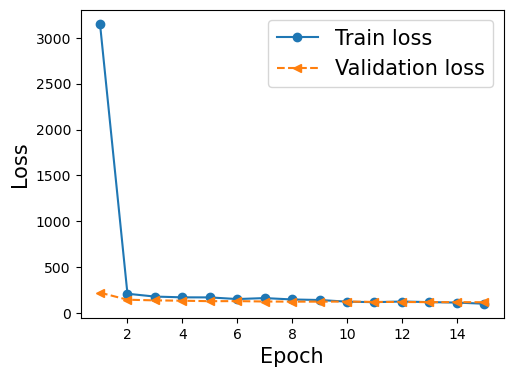

In [73]:
hist = history.history
x_arr = np.arange(len(hist['loss'])) + 1

fig = plt.figure(figsize=(12, 4))
ax = fig.add_subplot(1, 2, 1)
ax.plot(x_arr, hist['loss'], '-o', label='Train loss')
ax.plot(x_arr, hist['val_loss'], '--<', label='Validation loss')
ax.legend(fontsize=15)
ax.set_xlabel('Epoch', size=15)
ax.set_ylabel('Loss', size=15)
